### Option A: Data Analysis & Visualization
Please answer the following questions about the dataset:
* How many ships of each type are there?
* How do the emissions profiles differ for the different ship types?
* What is the relationship between ship Deadweight and emissions intensity?
* How many miles did each vessel in the database travel?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import glob
import os

In [2]:
data = glob.glob(os.path.join('data', "*.xlsx"))
data = pd.concat((pd.read_excel(f, header=2) for f in data), ignore_index=True)

C:\Users\rharr\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rharr\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rharr\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Port of Registry,Home Port,Ice Class,DoC issue date,DoC expiry date,...,CO₂ emissions per distance on laden voyages [kg CO₂ / n mile],CO₂ emissions per transport work (mass) on laden voyages [g CO₂ / m tonnes · n miles],CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],CO₂ emissions per transport work (dwt) on laden voyages [g CO₂ / dwt carried · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Additional information to facilitate the understanding of the reported average operational energy efficiency indicators,Average density of the cargo transported [m tonnes / m³],Annual Time spent at sea [hours],Time spent at sea [hours]
0,5383304,ASTORIA,Passenger ship,2018.0,Not Applicable,NaN,NaN,NaN,05/02/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6417097,MARCO POLO,Passenger ship,2018.0,Not Applicable,NaN,NaN,IC,05/02/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6511128,RED STAR 1,Ro-pax ship,2018.0,EIV (45.57 gCO₂/t·nm),NaN,NaN,NaN,30/04/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6602898,OCEAN MAJESTY,Passenger ship,2018.0,EIV (31.73 gCO₂/t·nm),Madeira,NaN,NaN,06/05/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6703343,EQUALITY,Other ship types,2018.0,Not Applicable,Beirut,NaN,NaN,30/06/2019,30/06/2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36690,9903839,POLA VARVARA,General cargo ship,2020.0,EEDI (14.47 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2741.36,2741.36
36691,9903841,POLA AGATA,General cargo ship,2020.0,EEDI (14.12 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.67,329.67
36692,9903853,POLA ALEXIA,General cargo ship,2020.0,EEDI (14.21 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.74,461.74
36693,9903865,POLA MARINA,General cargo ship,2020.0,EEDI (14.17 gCO₂/t·nm),NaN,NaN,NaN,30/06/2021,30/06/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729.83,729.83


In [4]:
data.describe()

,IMO Number,Reporting Period,Total fuel consumption [m tonnes],Fuel consumptions assigned to On laden [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],CO₂ emissions assigned to Passenger transport [m tonnes],...,Through ice [n miles],Total time spent at sea [hours],Total time spent at sea through ice [hours],Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Average density of the cargo transported [m tonnes / m³],Annual Time spent at sea [hours],Time spent at sea [hours]
count,3.669500e+04,36695.000000,36695.000000,3927.000000,36695.000000,3.669500e+04,36695.000000,36695.000000,3.669500e+04,1166.000000,...,1941.000000,2.465100e+04,1941.000000,11.000000,0.0,11.000000,0.0,5.00000,12044.000000,12044.000000
mean,9.441982e+06,2018.994223,3677.004621,3453.196970,11477.932210,3.651750e+03,3417.069357,3764.986606,7.629793e+02,17867.958525,...,24.254446,2.710496e+04,2.654359,123.646364,NaN,389.910909,NaN,0.35000,2237.870614,2237.870614
std,2.894139e+05,0.813757,4649.857517,4822.301742,14406.357526,1.275514e+04,5131.738946,5847.605816,6.728842e+03,19206.775242,...,391.204187,3.843147e+06,41.214573,17.171287,NaN,55.464263,NaN,0.47927,1590.261266,1590.261266
min,5.383304e+06,2018.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,92.540000,NaN,288.380000,NaN,0.00000,0.000000,0.000000
25%,9.303209e+06,2018.000000,1065.385000,777.805000,3343.580000,0.000000e+00,675.115000,821.380000,1.222350e+02,3992.242500,...,0.000000,1.095560e+03,0.000000,114.630000,NaN,360.910000,NaN,0.00000,948.900000,948.900000
50%,9.442873e+06,2019.000000,2111.580000,1553.800000,6627.170000,6.083200e+02,1848.340000,2112.390000,3.215400e+02,10620.215000,...,0.000000,2.172600e+03,0.000000,130.570000,NaN,412.090000,NaN,0.00000,1861.270000,1861.270000
75%,9.643504e+06,2020.000000,4212.645000,3461.090000,13215.770000,2.721655e+03,3876.925000,4262.650000,8.553700e+02,25280.232500,...,0.000000,3.938900e+03,0.000000,134.225000,NaN,421.625000,NaN,0.87000,3312.020000,3312.020000
max,9.910088e+06,2020.000000,98465.200000,44715.460000,315478.510000,1.672576e+06,170643.000000,359534.000000,1.260629e+06,105415.090000,...,11103.300000,6.034010e+08,1166.350000,143.880000,NaN,456.030000,NaN,0.88000,8603.500000,8603.500000


In [5]:
print('Percentage of missing records')
print('--------------------')
for col in data.columns:
    if data[col].isna().sum() != 0:
        print('{}: {}%'.format(col, round(100*data[col].isna().sum()/len(data.index))))

Percentage of missing records
--------------------
Technical efficiency: 5%
Port of Registry: 9%
Home Port: 81%
Ice Class: 83%
Verifier Number: 65%
A: 54%
B: 69%
C: 68%
D: 100%
Fuel consumptions assigned to On laden [m tonnes]: 89%
CO₂ emissions assigned to Passenger transport [m tonnes]: 97%
CO₂ emissions assigned to Freight transport [m tonnes]: 97%
CO₂ emissions assigned to On laden [m tonnes]: 89%
Annual Total time spent at sea [hours]: 33%
Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]: 10%
Annual average Fuel consumption per transport work (volume) [g / m³ · n miles]: 97%
Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles]: 88%
Annual average Fuel consumption per transport work (pax) [g / pax · n miles]: 96%
Annual average Fuel consumption per transport work (freight) [g / m tonnes · n miles]: 97%
Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]: 10%
Annual average CO₂ emission

In [16]:
# Import Cities
cities = pd.read_csv('data/worldcities.csv')

In [18]:
data['Port of Registry'] = data['Port of Registry'].str.lower()

C:\Users\rharr\AppData\Local\Temp\ipykernel_14632\1223752277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Port of Registry'] = data['Port of Registry'].str.lower()


In [23]:
data['city'] = data['Port of Registry']

C:\Users\rharr\AppData\Local\Temp\ipykernel_14632\1193179990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['Port of Registry']


In [21]:
cities['city'] = cities['city'].str.lower()
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,são paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [24]:
merged = pd.merge(data, cities, on="city")

In [25]:
merged

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Port of Registry,DoC issue date,DoC expiry date,Verifier Name,Verifier NAB,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,6602898,OCEAN MAJESTY,Passenger ship,2018,EIV (31.73 gCO₂/t·nm),madeira,06/05/2019,30/06/2020,Bureau Veritas Certification France,COFRAC,...,Madeira,39.1856,-84.3734,United States,US,USA,Ohio,NaN,9245.0,1840001605
1,6602898,OCEAN MAJESTY,Passenger ship,2018,EIV (31.73 gCO₂/t·nm),madeira,06/05/2019,30/06/2020,Bureau Veritas Certification France,COFRAC,...,Madeira,-3.4828,-42.5039,Brazil,BR,BRA,Piauí,NaN,7816.0,1076662656
2,9000168,RCGS RESOLUTE,Passenger ship,2018,EEDI (22.48 gCO₂/t·nm),madeira,28/06/2019,30/06/2020,AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE ME...,Hellenic Accreditation System (ESYD),...,Madeira,39.1856,-84.3734,United States,US,USA,Ohio,NaN,9245.0,1840001605
3,9000168,RCGS RESOLUTE,Passenger ship,2018,EEDI (22.48 gCO₂/t·nm),madeira,28/06/2019,30/06/2020,AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE ME...,Hellenic Accreditation System (ESYD),...,Madeira,-3.4828,-42.5039,Brazil,BR,BRA,Piauí,NaN,7816.0,1076662656
4,9000742,MSC JENNY,Container ship,2018,EIV (15.74 gCO₂/t·nm),madeira,04/06/2019,30/06/2020,DNV GL,German national accreditation body (DAkkS),...,Madeira,39.1856,-84.3734,United States,US,USA,Ohio,NaN,9245.0,1840001605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39876,9408138,EVERGREEN STATE,Oil tanker,2020,EIV (5.3 gCO₂/t·nm),wilmington,29/04/2021,30/06/2022,AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE ME...,Hellenic Accreditation System (ESYD),...,Wilmington,39.7415,-75.5413,United States,US,USA,Delaware,NaN,70166.0,1840005579
39877,9408138,EVERGREEN STATE,Oil tanker,2020,EIV (5.3 gCO₂/t·nm),wilmington,29/04/2021,30/06/2022,AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE ME...,Hellenic Accreditation System (ESYD),...,Wilmington,42.5609,-71.1654,United States,US,USA,Massachusetts,NaN,23377.0,1840053495
39878,9408138,EVERGREEN STATE,Oil tanker,2020,EIV (5.3 gCO₂/t·nm),wilmington,29/04/2021,30/06/2022,AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE ME...,Hellenic Accreditation System (ESYD),...,Wilmington,39.4387,-83.8184,United States,US,USA,Ohio,NaN,12366.0,1840010630
39879,9408138,EVERGREEN STATE,Oil tanker,2020,EIV (5.3 gCO₂/t·nm),wilmington,29/04/2021,30/06/2022,AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE ME...,Hellenic Accreditation System (ESYD),...,Wilmington,51.4309,0.1876,United Kingdom,GB,GBR,Kent,NaN,7178.0,1826420723


In [6]:
data = data.loc[:, data.isin(['NULL', np.nan]).mean() < .5]

In [7]:
# How many ships of each type are there?
print('Ship counts by type')
print('-----------')
for i in data['Ship type'].unique():
    print('{}: {}'.format(i, len(data.loc[data['Ship type'] == i]['IMO Number'].unique())))

Ship counts by type
-----------
Passenger ship: 220
Ro-pax ship: 422
Other ship types: 209
Ro-ro ship: 314
Gas carrier: 496
Bulk carrier: 5744
General cargo ship: 1519
Vehicle carrier: 560
Chemical tanker: 1823
Container ship: 2375
Refrigerated cargo carrier: 194
Container/ro-ro cargo ship: 88
Oil tanker: 2707
Combination carrier: 18
LNG carrier: 330


In [8]:
# How do the emissions profiles differ for the different ship types?


In [9]:
# Columns dealing with emissions
emission_cols = [col for col in data.columns if 'emission' in col]
emission_cols

['Total CO₂ emissions [m tonnes]',
 'CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]',
 'CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]',
 'CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]',
 'CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]',
 'Annual average CO₂ emissions per distance [kg CO₂ / n mile]',
 'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]']

In [10]:
data['Reporting Period'] = data['Reporting Period'].astype(int)

C:\Users\rharr\AppData\Local\Temp\ipykernel_14632\66281718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reporting Period'] = data['Reporting Period'].astype(int)


In [11]:
rel_cols = ['Ship type', 'Total CO₂ emissions [m tonnes]']

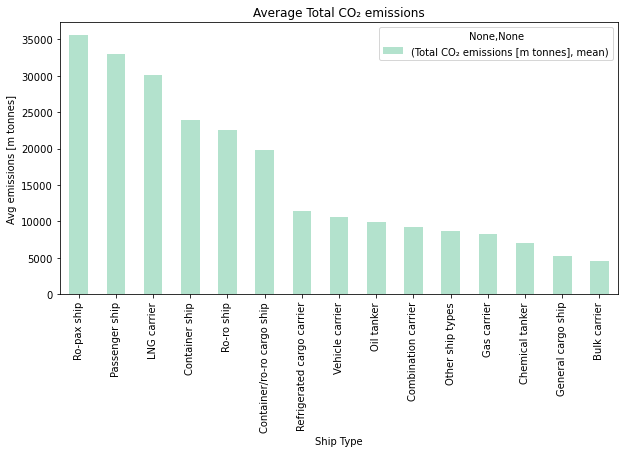

In [12]:
data[rel_cols].groupby(['Ship type']).agg(['mean']).sort_values(by=('Total CO₂ emissions [m tonnes]', 'mean'),
                                                                     ascending=False).plot(kind="bar",
                                                                                           figsize=(10, 5),
                                                                                           title='Average Total CO₂ emissions',
                                                                                           xlabel = 'Ship Type',
                                                                                           ylabel = 'Avg emissions [m tonnes]',
                                                                                           colormap='Pastel2');

In [13]:
# What is the relationship between ship Deadweight and emissions intensity?


In [14]:
# How many miles did each vessel in the database travel?
